In [1]:
from gensim.models import AuthorTopicModel
from gensim.corpora import mmcorpus
from gensim.test.utils import common_dictionary, datapath, temporary_file

In [2]:
import networkx
import pandas as pd

In [3]:
thesis_df = pd.read_csv('theses_v2.csv')
thesis_df

,Unnamed: 0,title,school,department,degree,submitting_type,language,subfield,research_field,keyword,committee_chair,committee_members,graduation_year,partnering_agency,abstract_length,abstract
0,0,Does Inflammation Damage White Matter ...,Emory College,Neuroscience and Behavioral Biology,B.S.,Honors Thesis,English,NaN,"Health Sciences, Mental Health; Psychology, Ps...",Neurobiology; Depression; DTI Imaging,Boadie Dunlop,Kate O'Toole;Micheal Crutcher,2020,NaN,2451,Background: Major depressive disorder (MDD) is...
1,1,Chlorhexidine bigluconate resistance in Met...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Epidemiology; Biology, Microb...",MRSA; Antimicrobial Resistance,Scott Fridkin,Sarah Satola,2020,NaN,2283,Background: With increased chlorhexidine use i...
2,2,IRF4 controls cell fate outcomes during the...,Laney Graduate School,Biological and Biomedical Sciences,Ph.D.,Dissertation,English,Genetics and Molecular Biology,"Health Sciences, Immunology; Biology, Cell; Bi...",Plasma cell; IRF4; B cell; MYC; L-selectin; CD...,Joshy Jacob;Roger B. Deal;Jeremy M. Boss;Willi...,NaN,2021,NaN,3042,Naive B cell (nB) differentiation to antibody-...
3,3,From Surviving to Thriving: Exploring Healt...,Candler School of Theology,Ministry,DMin,Dissertation,English,NaN,Theology,Succession,Jennifer Ayres,Teresa Fry Brown,2021,NaN,1092,This project focuses on developing strategic p...
4,4,Maternal Exposures to Cigarette Smoking and ...,Rollins School of Public Health,Epidemiology,M.P.H.,Master's Thesis,English,Epidemiology - MPH & MSPH,"Health Sciences, Public Health; Health Science...",case-control study; alcohol; birth defects; ep...,Vijaya Kancherla;Paul Romitti,NaN,2020,"University, college or education institution (...",2606,BACKGROUND: Congenital diaphragmatic hernia (...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9976,Zimbabwe's Maturing HIV Epidemic: A Triangulat...,Rollins School of Public Health,Global Health,MPH,Master's Thesis,English,NaN,"Health Sciences, Public Health",Zimbabwe; HIV; AIDS; Data triangulation; human...,Roger Rochat,NaN,2015,"International governmental organization (e.g.,...",1955,Objective: To assess Zimbabwe's HIV prevalence...
9977,9977,Zooarchaeological Faunal Identifiability: Usin...,Emory College,Anthropology,B.S.,Honors Thesis,English,NaN,"Anthropology, Archaeology",GIS; Faunal Identifiability; Zooarchaeology,Jessica Thompson;Michael Page,John Lindo;Melvin Konner,2019,NaN,2160,Zooarchaeological analysis aims to identify th...
9978,9978,Zoomorphic Others: The Animalization of Stigma...,Laney Graduate School,English and Creative Writing,MA,Master's Thesis,English,NaN,"Literature, General; Literature, Modern",animality; criminality; zoomorphism; animaliza...,Laura Otis,Christina Marie Colvin;Sari B Altschuler,2016,NaN,1584,"Zoomorphism, the act of portraying humans with..."
9979,9979,Zoonotic Diseases in Refugee or Internally Dis...,Rollins School of Public Health,Global Health,MPH,Master's Thesis,English,NaN,"Agriculture, Animal Pathology; Health Sciences...",Zoonotic Disease; Conflict; Refugee Camp; Camp...,Stephanie Salyer,Casey Barton-Behravesh;Carlos Navarro Colorado,2017,CDC,2238,Introduction: Emerging and re-emerging zoonoti...


In [4]:
dep_to_thesis_title = dict()
dep_to_thesis_abstract = dict()

for idx, row in thesis_df.iterrows():
    
    if type(row['department']) == float: continue
    
    if row['department'] not in dep_to_thesis_title:
#         print(row['department'])
        dep_to_thesis_title[row['department']] = []
        dep_to_thesis_abstract[row['department']] = []
        
    dep_to_thesis_title[row['department']].append(row['title'])
    dep_to_thesis_abstract[row['department']].append(row['abstract'])
    
dep_to_thesis_title

{'Neuroscience and Behavioral Biology': ['        Does Inflammation Damage White Matter Tracts in Patients with Major Depression',
  ' The Role of RNF114 and NF-Œ∫B in Chronic Traumatic Encephalopathy (CTE): Experimental Alteration of the Inflammatory Cascade in Cell Culture and Evaluation of a Novel Cellular Trauma Model',
  '7,8-Dihydroxyflavone Facilitates the Consolidation of\nReward-Related Learning',
  'A Case Study of Opinions on Medical Agency in Alzheimer‚Äôs Disease and Alzheimer‚Äôs Disease Related Dementias (AD/ADRD)',
  'A circuit-specific role for ifenprodil in blocking cocaine-induced habits',
  'A Comparison of Phosphodiesterase Type 4 (PDE4) Expression in the\nBLA in Control and Chronically Stressed Rats',
  'A Role for Notch Pathway Signaling in Amygdala-Dependent Fear\nLearning',
  'A Standardized Method of Detecting Movement Onset in Ballistic Wrist Extension Movements of Stroke Patients',
  'A Test of Inhibitory Resource Depletion in Rhesus Macaques (Maccaca\nmulat

In [7]:
author2doc = dict()

for idx, row in thesis_df.iterrows():
    
    if type(row['department']) == float: continue
    
    if row['department'] not in author2doc:
        author2doc[row['department']] = []
        
    author2doc[row['department']].append(idx)


In [6]:
corpus_text = thesis_df['abstract'].tolist()

In [7]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [8]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [9]:
corpus_tokenized = [tokenize(doc) for doc in corpus_text]
id2word = gensim.corpora.Dictionary(corpus_tokenized) 
BoW_corpus = [id2word.doc2bow(doc, allow_update=True) for doc in corpus_tokenized]


In [28]:
id2word.filter_extremes(no_below=2, no_above=1.0)

model = AuthorTopicModel(
        BoW_corpus, 
    author2doc=author2doc, 
    id2word=id2word, 
    num_topics=25,
    passes = 150
    )

In [29]:
topics = model.show_topics(25, 20, formatted=False)

for topic in topics:
    topic_num = topic[0]
    topic_words = ""
    
    topic_pairs = topic[1]
    for pair in topic_pairs:
        topic_words += pair[0] + ", "
    
    print("T" + str(topic_num) + ": " + topic_words)

T0: al, qaeda, pcmh, federalism, urologists, mnla, bccpta, framing, bedouin, democracy, premiums, hacrp, jordanian, akp, äòabd, nur, safir, uris, uprisings, ideology, 
T1: neurons, sensory, bdnf, motor, rats, mice, muscle, ros, ask, terminals, stimulation, mrna, cortex, dbh, mdma, gpi, seizure, monkeys, galanin, auditory, 
T2: kpna, mkk, elmods, ltmrs, etp, trak, klk, uch, songs, pvan, tetherin, pm, zal, ikap, vccs, cspb, ketamine, fabp, srsf, epha, 
T3: political, century, äôs, thesis, war, colonial, new, history, black, dissertation, american, state, women, south, examines, early, power, movement, society, states, 
T4: health, women, study, care, methods, results, data, use, research, hiv, community, conducted, children, participants, factors, program, social, sexual, water, services, 
T5: health, data, study, patients, use, care, results, treatment, analysis, public, risk, associated, disease, significant, women, methods, based, patient, research, cancer, 
T6: study, social, results

In [30]:
model.save('./author_topic_deps-25topics_150iters.model')

In [4]:
model = AuthorTopicModel.load('./author_topic_deps-25topics_150iters.model')

In [31]:
for author in author2doc:
    print("AUTHOR: ", author)
    print(model.get_author_topics(author))

AUTHOR:  Neuroscience and Behavioral Biology
[(1, 0.07864138318463679), (5, 0.08389109331570753), (6, 0.4458892868286362), (11, 0.033791335240776786), (14, 0.33493116353790375), (21, 0.013285470030407101)]
AUTHOR:  Epidemiology
[(4, 0.1557208495360503), (5, 0.14085042190931388), (6, 0.04794213669214444), (10, 0.02134372305260142), (14, 0.01453292567840167), (22, 0.5886630893603507), (23, 0.018029539347115965)]
AUTHOR:  Biological and Biomedical Sciences
[(2, 0.016416808255343827), (5, 0.0898565631443142), (6, 0.10878399495155751), (10, 0.03415838248470463), (11, 0.014847684155492338), (14, 0.6639365845278543), (22, 0.04584648303192785)]
AUTHOR:  Ministry
[(5, 0.09581781397371891), (6, 0.10829296847132892), (8, 0.27894886226708354), (11, 0.0222953333489188), (16, 0.05280994991882642), (19, 0.19753529152159385), (21, 0.23752408281085352)]
AUTHOR:  Global Health
[(4, 0.7003962686710719), (5, 0.07602912405796909), (6, 0.04699983376449529), (16, 0.022968590356073466), (22, 0.126530476325196

In [5]:
def convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di

In [8]:
a_t_matrix = []
author_list = []
for idx, author in enumerate(author2doc):
    author_list.append(author)
    a_t_matrix.append([])
    dist = model.get_author_topics(author)
    dictionary = dict()
    dictionary = convert(dist, dictionary)
    for i in range(0,25):
        if i in dictionary: a_t_matrix[idx].append(dictionary[i][0])
        else: a_t_matrix[idx].append(0)
            


In [9]:
for idx, author in enumerate(author_list):
    print("AUTHOR : ", author, author_list[idx])
    print(a_t_matrix[idx])

AUTHOR :  Neuroscience and Behavioral Biology Neuroscience and Behavioral Biology
[0, 0.07864138318463679, 0, 0, 0, 0.08389109331570753, 0.4458892868286362, 0, 0, 0, 0, 0.033791335240776786, 0, 0, 0.33493116353790375, 0, 0, 0, 0, 0, 0, 0.013285470030407101, 0, 0, 0]
AUTHOR :  Epidemiology Epidemiology
[0, 0, 0, 0, 0.1557208495360503, 0.14085042190931388, 0.04794213669214444, 0, 0, 0, 0.02134372305260142, 0, 0, 0, 0.01453292567840167, 0, 0, 0, 0, 0, 0, 0, 0.5886630893603507, 0.018029539347115965, 0]
AUTHOR :  Biological and Biomedical Sciences Biological and Biomedical Sciences
[0, 0, 0.016416808255343827, 0, 0, 0.0898565631443142, 0.10878399495155751, 0, 0, 0, 0.03415838248470463, 0.014847684155492338, 0, 0, 0.6639365845278543, 0, 0, 0, 0, 0, 0, 0, 0.04584648303192785, 0, 0]
AUTHOR :  Ministry Ministry
[0, 0, 0, 0, 0, 0.09581781397371891, 0.10829296847132892, 0, 0.27894886226708354, 0, 0, 0.0222953333489188, 0, 0, 0, 0, 0.05280994991882642, 0, 0, 0.19753529152159385, 0, 0.2375240828108

In [10]:
a_a_matrix = []

for idx_1, author_1 in enumerate(author_list):
    a_a_matrix.append([])
    for idx_2, author_2 in enumerate(author_list):
        similarity = 0
        for i in range(0,25):
            similarity += a_t_matrix[idx_1][i] * a_t_matrix[idx_2][i]
        a_a_matrix[idx_1].append(similarity)

In [11]:
import numpy as np

matrix = np.array(a_a_matrix)

print(matrix)

[[0.32553668 0.03806051 0.27891856 ... 0.03316377 0.00130659 0.1430847 ]
 [0.03806051 0.39390233 0.05523781 ... 0.00620962 0.03325829 0.03315532]
 [0.27891856 0.05523781 0.46447861 ... 0.00871817 0.00276977 0.03855643]
 ...
 [0.03316377 0.00620962 0.00871817 ... 0.26083755 0.10773341 0.09298645]
 [0.00130659 0.03325829 0.00276977 ... 0.10773341 0.31432845 0.03303809]
 [0.1430847  0.03315532 0.03855643 ... 0.09298645 0.03303809 0.16666298]]


In [12]:
threshold = 1/25
threshold

0.04

In [13]:
author_1_list = []
author_2_list = []
for idx_1, author_1 in enumerate(author_list):
    for idx_2, author_2 in enumerate(author_list):
        if author_1 == author_2: continue
            
for i in range(0,len(author_list)):
    for j in range(i+1, len(author_list)):
        if a_a_matrix[i][j]>=threshold:
            author_1 = author_list[i]
            author_2 = author_list[j]
            if author_1 < author_2:
                tmp = author_1
                author_1 = author_2
                author_2 = tmp
            author_1_list.append(author_1)
            author_2_list.append(author_2)


In [14]:
import pandas as pd
import networkx

author_connection_df = pd.DataFrame(
    {
        "dep_1": author_1_list, "dep_2":author_2_list
    }
)

In [15]:
author_connection_df

,dep_1,dep_2
0,Neuroscience and Behavioral Biology,Biological and Biomedical Sciences
1,Neuroscience and Behavioral Biology,Ministry
2,Neuroscience and Behavioral Biology,Chemistry
3,Neuroscience and Behavioral Biology,Divinity
4,Neuroscience and Behavioral Biology,Behavioral Sciences and Health Education
...,...,...
1901,Religion and Anthropology,Asian and Asian American Studies
1902,Philosophy and Religion,Asian and Asian American Studies
1903,Spanish and Linguistics,Asian and Asian American Studies
1904,Religion and Anthropology,Philosophy and Religion


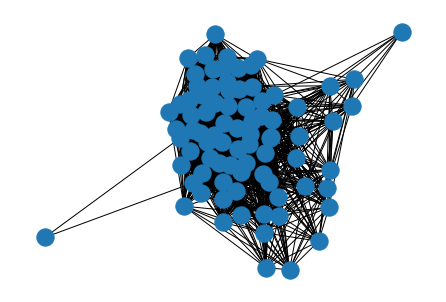

In [16]:
G = networkx.from_pandas_edgelist(author_connection_df, 'dep_1', 'dep_2')
networkx.draw(G)

In [18]:
topic_model_pagerank = networkx.pagerank(G)
sorted(topic_model_pagerank.items(), key=lambda x: x[1], reverse=True)

[('Bioethics', 0.016817016543707555),
 ('English and History', 0.016661431776653503),
 ('Anthropology', 0.01608178109677627),
 ('Interdisciplinary Studies in Society and Culture', 0.016012671564283418),
 ('Psychology', 0.015681411813202734),
 ('Quantitative Science', 0.015545568317418039),
 ('Neuroscience and Behavioral Biology', 0.015436752269091608),
 ('Spanish and Linguistics', 0.014922802831431893),
 ('Religion and Classical Civilization', 0.014792270815862957),
 ('Sociology', 0.014788635329742924),
 ("Women's, Gender, and Sexuality Studies", 0.014770760936387451),
 ('Italian Studies', 0.01465347370283586),
 ('Psychology and Linguistics', 0.014542857393817613),
 ('Asian and Asian American Studies', 0.014474948721788745),
 ('History', 0.0143873207890978),
 ('Graduate Institute of the Liberal Arts', 0.014378785094261751),
 ('Divinity', 0.014367767927923925),
 ('Film and Media Studies', 0.014159209032225862),
 ('Russian and East European Studies', 0.014158401428865661),
 ('Linguistics

In [21]:
import pickle

file = open('dep_centrality_pickle', 'rb')
department_connection_betweenness = pickle.load(file)
file.close()

sorted(department_connection_betweenness.items(), key=lambda x: x[1], reverse=True)

[('Religion', 0.034226326205362693),
 ('Psychology', 0.034015032398097556),
 ('English and Creative Writing', 0.028923846946581202),
 ('Biology', 0.028029738972057405),
 ('History', 0.027485019430924202),
 ('Neuroscience and Behavioral Biology', 0.02716904813583802),
 ('Anthropology', 0.02505528271612096),
 ('Sociology', 0.0241272392188996),
 ("Women's, Gender, and Sexuality Studies", 0.02120367955833643),
 ('Interdisciplinary Studies in Society and Culture', 0.020781846289996662),
 ('Philosophy', 0.01989594255447184),
 ('Art History', 0.01873478978261236),
 ('Economics', 0.017699377791484488),
 ('Graduate Institute of the Liberal Arts', 0.016602487471360405),
 ('Political Science', 0.01654291701063889),
 ('International Studies', 0.013459842669473726),
 ('Chemistry', 0.013239481559296397),
 ('Biological and Biomedical Sciences', 0.011925580790169085),
 ('Music', 0.009797413344125164),
 ('Spanish and Portuguese', 0.00947780364230781),
 ('Bioethics', 0.009404739090092049),
 ('Mathematic

In [44]:
import statsmodels.api as sm

department_connection_betweenness_in_order = []
topic_model_betweenness_in_order = []
for author in author_list:
    department_connection_betweenness_in_order.append(department_connection_betweenness[author])
    topic_model_betweenness_in_order.append(topic_model_betweenness[author])

In [45]:
x, y = np.array(department_connection_betweenness_in_order), np.array(topic_model_betweenness_in_order)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.916
Date:                Sun, 12 Dec 2021   Prob (F-statistic):             0.0915
Time:                        06:58:42   Log-Likelihood:                 325.82
No. Observations:                  83   AIC:                            -647.6
Df Residuals:                      81   BIC:                            -642.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      7.170      0.0

statsmodels.iolib.summary.Summary